# Import Libraries (#1)

In [1]:
# imports libraries
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

# Import Data (#2)

In [2]:
# imports dataframe
path = r'/Users/oliviamurphy/Desktop/Airlines Project/02 Data/Prepared Data'
airlines_df = pd.read_csv(os.path.join(path, 'airlines_final_df_new_variables.csv'))

## Reprocessing

In [3]:
# outputes variables
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278007 entries, 0 to 278006
Data columns (total 34 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Unnamed: 0                                      278007 non-null  int64  
 1   Carrier                                         278007 non-null  object 
 2   Date (MM/DD/YYYY)                               278007 non-null  object 
 3   Flight Number                                   278007 non-null  float64
 4   Tail Number                                     275246 non-null  object 
 5   Destination Airport                             278007 non-null  object 
 6   Scheduled Departure Time                        278007 non-null  object 
 7   Actual Departure Time                           278007 non-null  object 
 8   Scheduled Elapsed Time (Minutes)                278007 non-null  float64
 9   Actual Elapsed Time (Minut

In [4]:
# creates dataframe with only numerical variables
airlines_df_num = airlines_df[['Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)', 'Known Total Delay (Minutes)', 'Taxi-Out Time (Minutes)', 'Delay Carrier (Minutes)', 'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)', 'Known Total Delay (Minutes)', 'Difference in Actual & Expected Air Time']]

# Using the Elbow Technique (#3)

In [5]:
# finds optimal cluster number
cluster_range = range(1, 10)
kmeans = [KMeans(n_clusters=i)for i in cluster_range]

In [6]:
# outputs variation scores
score = [kmeans[i].fit(airlines_df_num).score(airlines_df_num) for i in 
        range(len(kmeans))]

In [7]:
# outputs list of scores
score

[-4822159782.649823,
 -2237153342.0082808,
 -1760280219.5609553,
 -1344477746.541691,
 -1110253974.71178,
 -905137867.1184155,
 -778522489.4420644,
 -696902042.0441417,
 -638446002.987461]

Text(0, 0.5, 'Score (Variance)')

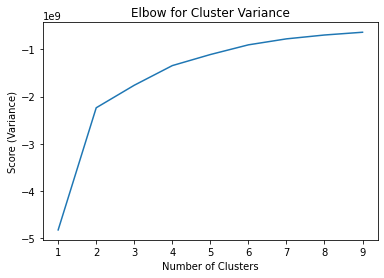

In [8]:
# 
pl.plot (cluster_range, score)
pl.title('Elbow for Cluster Variance')
pl.xlabel('Number of Clusters')
pl.ylabel('Score (Variance)')

## Decide which number of Clusters to Use (#4)
## Decision & Explanation: 4 clusters is the optimal number of clusters becaust that after 4, the variance begins to flatten out. 

# K-means algorithm (#5)

In [9]:
# defines k-means object & number of clusters
kmeans2 = KMeans(n_clusters = 4, n_jobs = -1)

In [10]:
# fits k-means object to dataframe
kmeans2.fit(airlines_df_num)

/Users/oliviamurphy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [11]:
airlines_df_num.shape

(278007, 11)

In [12]:
airlines_df.shape

(278007, 34)

# Add new column with clusters (#6)

In [13]:
# adds a column for cluster numbers to airlines_df_num
airlines_df['Cluster Number'] = kmeans2.fit_predict(airlines_df_num)

/Users/oliviamurphy/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [14]:
#checks first five rows of airlines_df_num['Cluster Number']
airlines_df['Cluster Number'].head()

0    2
1    2
2    2
3    2
4    2
Name: Cluster Number, dtype: int32

In [15]:
# checks value counts of airlines_df_num['Cluster Number']
airlines_df['Cluster Number'].value_counts()

2    136806
3     74555
1     66161
0       485
Name: Cluster Number, dtype: int64

# Create scatterplots & discuss how and why Discuss how & why clusters make sense or don't (#7 - #8)

Text(0.5, 1.0, 'K-Means Clusters for the Relationship Between Taxi-Out Time & Known Total Delay')

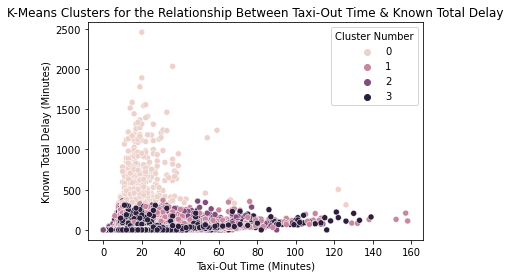

In [16]:
# Creates a scatterplot for the Taxi-Out Time & Relationship between known total delay (minutes)
delay_vs_taxiout = sns.scatterplot(data = airlines_df, x = 'Taxi-Out Time (Minutes)', y = 'Known Total Delay (Minutes)', hue = 'Cluster Number')
plt.title('K-Means Clusters for the Relationship Between Taxi-Out Time & Known Total Delay')


#  total delays of over 500 minutes have a shorter spread of taxi-out times (most below 40 minutes)
## this may make sense do to airline operations, for example teams at the airport have extra time to prepare for the landing to make it go smoothly, therefore having less time sitting on the runway. Delayed flights over a certain amount of minutes could also be prioritized to leave the runway.

Text(0.5, 1.0, 'K-Means Clusters for the Relationship Between Taxi-Out Time & Difference in Actual & Expected Air Time')

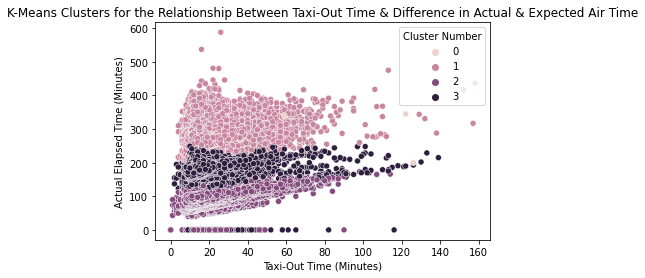

In [17]:
# Creates a scatterplot for the Taxi-Out Time & Relationship between actual and exppected airtime
taxiout_vs_airtime = sns.scatterplot(data = airlines_df, x = 'Taxi-Out Time (Minutes)', y = 'Actual Elapsed Time (Minutes)', hue = 'Cluster Number')
plt.title('K-Means Clusters for the Relationship Between Taxi-Out Time & Difference in Actual & Expected Air Time')

# Shorter Taxi-Out time seems to be linked with  slightly shorter actual elapsed time.This also could be due to airport operations - for example - longer flights may have to prepare for longer distances, etc. 
##  Cluster Number 1 has shorter Taxi-Out Times and Actual Elapsed Times, Cluster Number 0 has the next shortest taxi-out times & Actual Elapsed Time (Minutes), followed by group 3.

Text(0.5, 1.0, 'K-Means Clusters for the Relationship Between Known Total Delay (Minutes) & Difference in Actual & Expected Air Time')

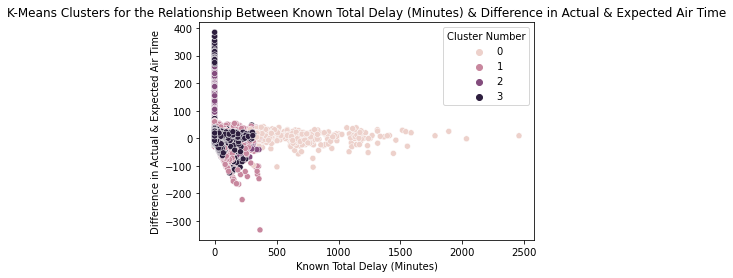

In [18]:
# Creates a scatterplot for the Relationship between known total delay (minutes) and difference in actual and expected airtime.
delay_vs_airtime = sns.scatterplot(data = airlines_df, x = 'Known Total Delay (Minutes)', y = 'Difference in Actual & Expected Air Time', hue = 'Cluster Number')
plt.title('K-Means Clusters for the Relationship Between Known Total Delay (Minutes) & Difference in Actual & Expected Air Time')

# Group 2 - airlines with longer delays (over 400 minutes) have smaller differences delays in flight times. It suggests that the longer delays are happening due to causes that do not occur during the flight.
# The other groups fall under delays of 500 minutes. Due to the variance, it could be possible these delays are partly due to a delay that happens in-flight

# Descriptive statistics for clusters (#9)

In [19]:
airlines_df.groupby('Cluster Number')['Known Total Delay (Minutes)', 'Taxi-Out Time (Minutes)', 'Difference in Actual & Expected Air Time'].agg('mean')

/var/folders/49/d7yrc74937g7tg22978g2xp80000gn/T/ipykernel_1426/3060421465.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  airlines_df.groupby('Cluster Number')['Known Total Delay (Minutes)', 'Taxi-Out Time (Minutes)', 'Difference in Actual & Expected Air Time'].agg('mean')


,Known Total Delay (Minutes),Taxi-Out Time (Minutes),Difference in Actual & Expected Air Time
Cluster Number,,,
0,600.705155,19.808247,5.585567
1,6.801394,17.293088,8.408080
2,8.011330,13.704362,10.992427
3,6.687385,15.260224,10.238012


# Group 2 has the highest delays and highest taxi out times, but lowest Difference in Actual & Expected Air Time, making it likely most causes of delay do not happen in flight.
# Note, median is not a good choice because so many flights have 0min delays.

# How are results useful for future steps in analytics pipeline? (#10)

# The results are useful because it tells me that most of the delays do not happen in the air - once on a plane it is less likely there will be a significant delay.
# Group 2 has the highest delays and highest taxi out times, but lowest Difference in Actual & Expected Air Time, making it likely most causes of delay do not happen in flight.
# next steps in the analytics pipeline would be to 1. rerun these charts invidividually for each airline to check whether they are consistent across all 4 airlines. Then, I would focus efforts back on each of the causes of delay.

In [20]:
# exports df file
airlines_df.to_csv(os.path.join(path, 'airlines_df_cluster.csv'))

In [21]:
airlines_df['Cluster Number'].value_counts()

2    136806
3     74555
1     66161
0       485
Name: Cluster Number, dtype: int64